In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.decomposition import PCA
import os

## Options

In [21]:
# == Options ==
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

In [22]:
# == Reading the dataset ==
dataset_path = "./data/SAheart.csv"
data = pd.read_csv(dataset_path)

In [23]:
# == Rename selected columns (if needed) ==
columns = []
# Replace _ if existing
data = data.rename(columns={column: column.replace("_%", "") for column in columns})

In [24]:
# == Remove id(row.names) column ==
data.drop("id", inplace=True, axis=1)

In [25]:
# == Print none values ==
data.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [26]:
# == Display the first rows ==
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [27]:
# == Select numeric columns ==
# (all columns are numeric except from famhist)
# data_numeric = data.select_dtypes(exclude="object")
# data_numeric.info(verbose=True, show_counts=True)
data['famhist'] = data['famhist'].map({'Absent': 0, 'Present': 1})
data_numeric = data
summary_statistics = data_numeric.describe().apply(lambda s: s.apply(lambda x: format(x, "g"))).transpose()
latex_table = summary_statistics.to_latex()

## PCA Analysis

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pca

ModuleNotFoundError: No module named 'pca'

In [29]:
# PCA Analysis Guide (looks helpful)
# https://www.youtube.com/watch?v=oiusrJ0btwA
# https://github.com/dataprofessor/code/blob/master/python/PCA_analysis.ipynb

In [30]:
# == Remove outliers before PCA Analysis ==
# It may not be necessary
for column_name in data_numeric.columns:
    z_scores = (data_numeric[column_name] - data_numeric[column_name].mean()) / data_numeric[column_name].std()
    data_numeric = data_numeric[abs(z_scores) < 3]  
# Remove data points with |Z-score| > 3

In [31]:
data_numeric.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
5,132,6.20,6.47,36.21,1,62,30.77,14.14,45,0


In [33]:
# == Normalize before PCA ==

scaler = StandardScaler()
# Trying out a different scaler
# scaler = MinMaxScaler() 
data_normalized = scaler.fit_transform(data_numeric)

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [19]:
# == Number of PCA's and variance captured ==
# The number of components is experimental at this stage
# Choosing the correct number of principal components is crucial
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
variance_ratios = []
# Trying out the different numbers
for number in numbers:
  pca_ = PCA(n_components=number)
  pca_.fit_transform(data_normalized)
  variance_ratios.append(np.sum(pca_.explained_variance_ratio_))
  print(f"Number of components\t{number}\tTotal variance\t{sum(pca_.explained_variance_ratio_)}")

plot_PCA_variance(numbers=numbers, ratios=variance_ratios)
# see major and minor grid

Number of components	1	Total variance	0.3086465452745978
Number of components	2	Total variance	0.43171325682562534
Number of components	3	Total variance	0.5463342839811544
Number of components	4	Total variance	0.6483229169138863
Number of components	5	Total variance	0.7355683496034335
Number of components	6	Total variance	0.8123318362489241
Number of components	7	Total variance	0.879609356989566
Number of components	8	Total variance	0.9370062718832776
Number of components	9	Total variance	0.9825179430739587


NameError: name 'plot_PCA_variance' is not defined

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [9] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


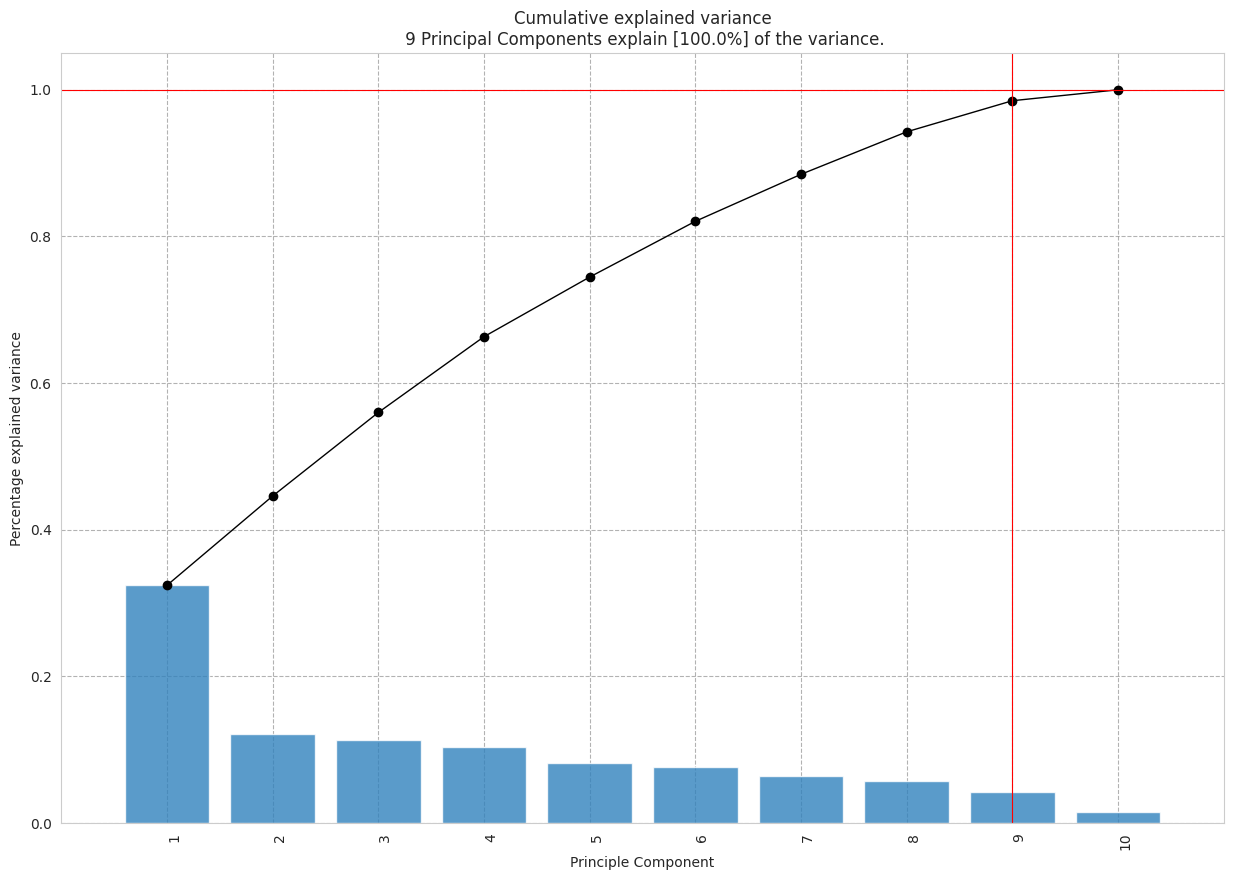

In [21]:
# == PCA variance captured ==
model = pca.pca()
out = model.fit_transform(data_normalized)
model.plot()


plt.grid(linestyle="--", alpha=0.6, color="gray") 
plt.ylim(ymin=0)
plt.show()

/tmp/ipykernel_3347/1520938091.py:128: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in common_legend.legendHandles:


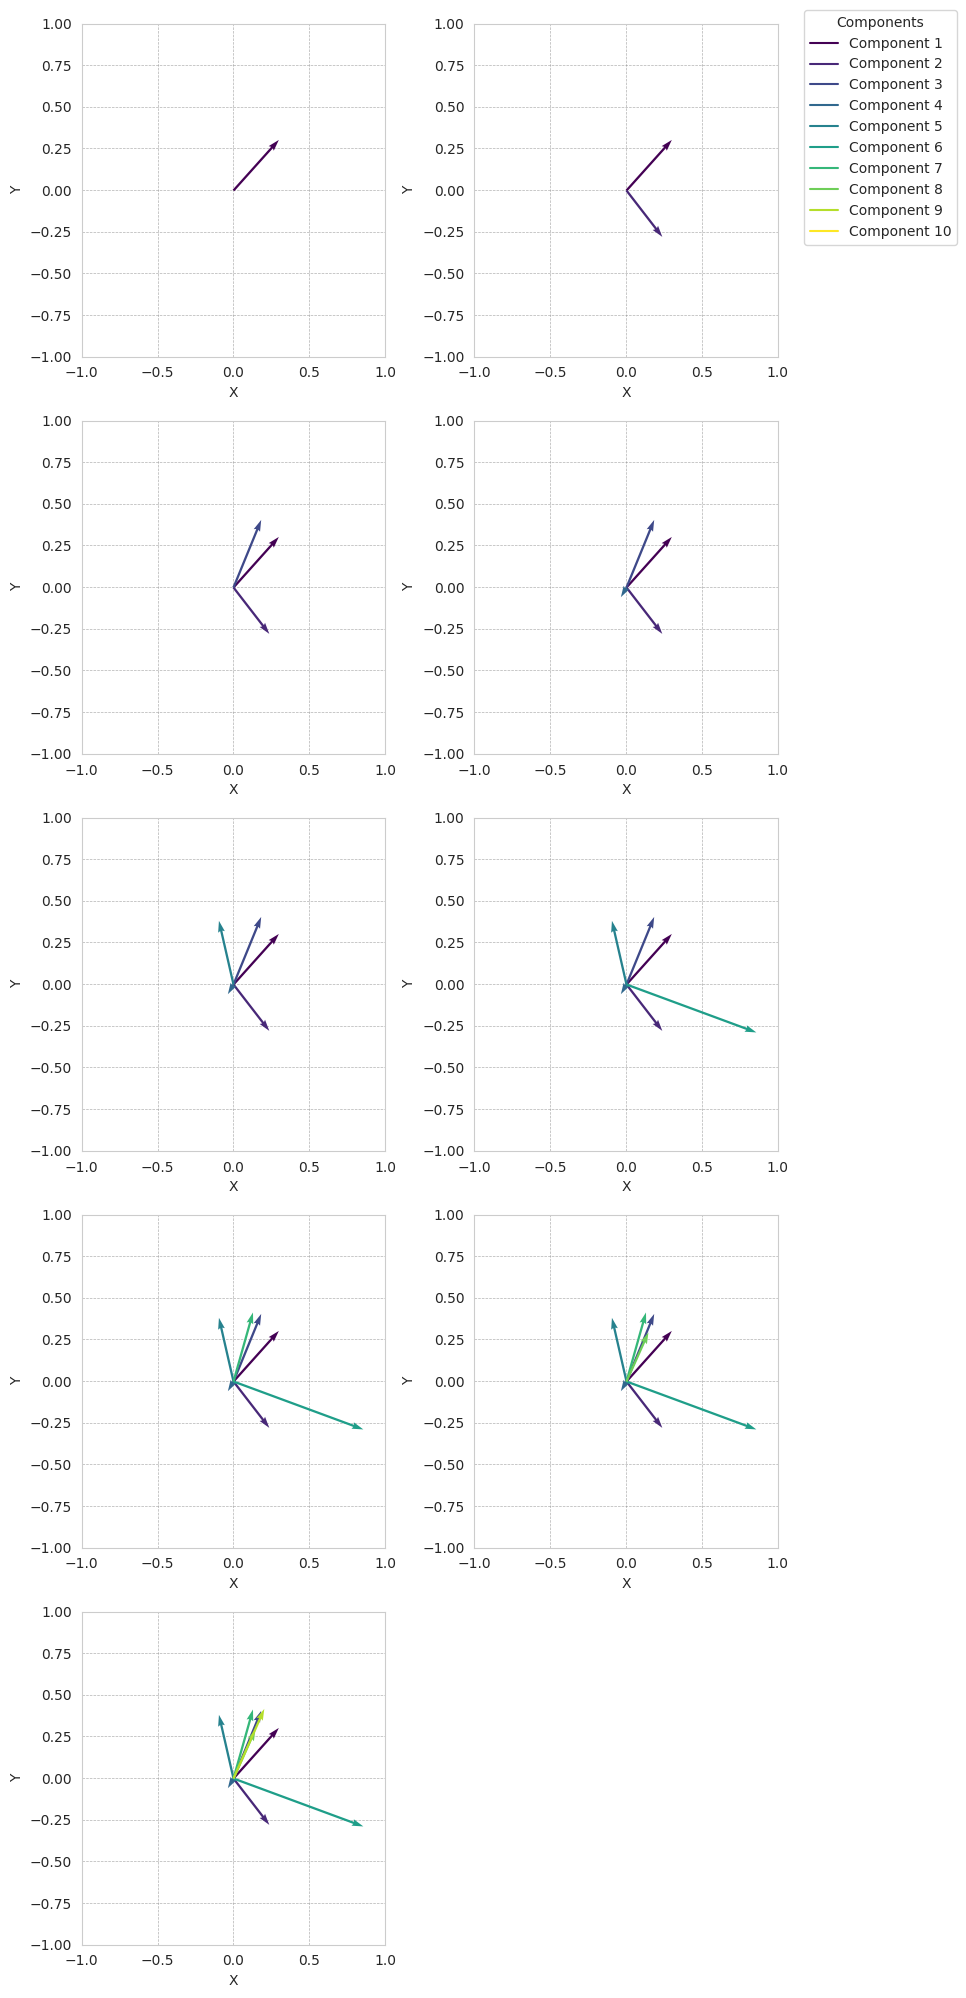

In [22]:
# == PCA directions ==
plot_PCA_directions(data_numeric=data_normalized, numbers=numbers)

In [23]:
# == PCA variance ratios ==
explained_variance_ratios = pca_.explained_variance_ratio_
most_informative_pca = explained_variance_ratios.argmax()

# Print explained variance ratios for all PCs
for i, explained_variance_ratio in enumerate(explained_variance_ratios):
    print(f"PC_{i + 1}: {explained_variance_ratio:.4f}")

print(f"The most informative PCA is PCA_{most_informative_pca + 1} with an explained variance ratio of {explained_variance_ratios[most_informative_pca]:.4f}")

PC_1: 0.3242
PC_2: 0.1218
PC_3: 0.1140
PC_4: 0.1033
PC_5: 0.0814
PC_6: 0.0760
PC_7: 0.0641
PC_8: 0.0579
PC_9: 0.0424
The most informative PCA is PCA_1 with an explained variance ratio of 0.3242


In [24]:
# == Interpret PCA_1 and direction ==
factor_loadings_pc1 = pca_.components_[0]
feature_names = data_numeric.columns
feature_loadings = dict(zip(feature_names, factor_loadings_pc1))
sorted_features = sorted(feature_loadings.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the features with the highest absolute factor loadings for PC1
print("Features contributing most to PC1:")
for feature, loading in sorted_features:
    print(f"{feature}: {loading:.4f}")

Features contributing most to PC1:
adiposity: 0.4740
age: 0.4384
obesity: 0.3802
ldl: 0.3418
tobacco: 0.3035
sbp: 0.2986
chd: 0.2729
famhist: 0.2218
alcohol: 0.1292
typea: -0.0104


In [25]:
# == Try out 3, 4, 5 PCAs ==
number = 3
pca_ = PCA(n_components=number)
pca_.fit(data_normalized)
data_pca = pca_.transform(data_normalized)
data_pca = pd.DataFrame(data_pca, columns=["PCA_" + str(i) for i in range(number)])

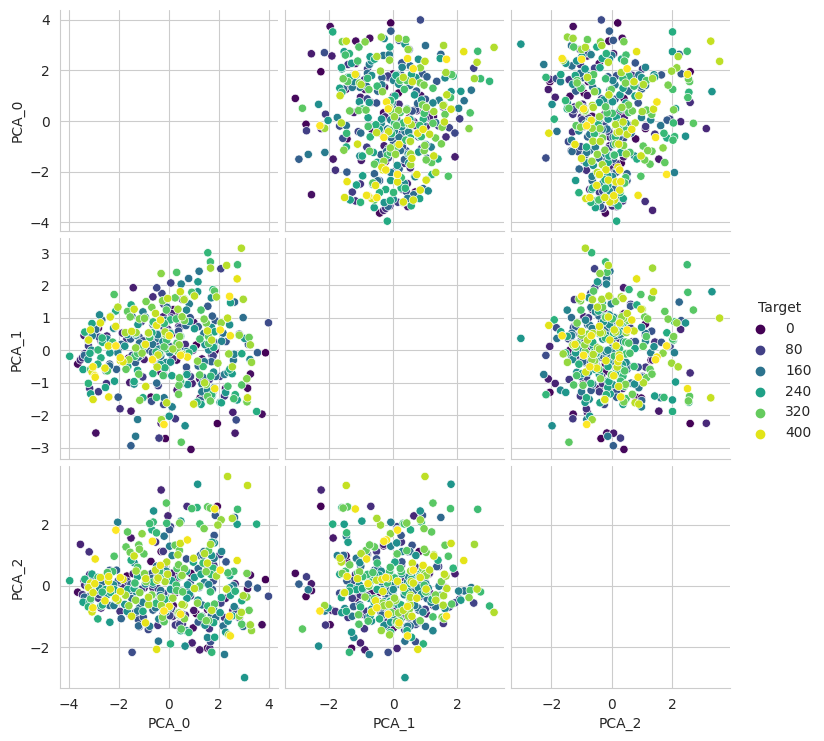

In [26]:
# == Pairplotting PCAs ==
# This is a useless plot for the time being
number = len(data_pca)
targets = list(range(number))
colors = plt.cm.viridis(np.linspace(0, 1, number))
data_pca["Target"] = targets

sns.set_style("whitegrid")
sns.pairplot(data_pca, hue="Target", palette="viridis")
plt.show()

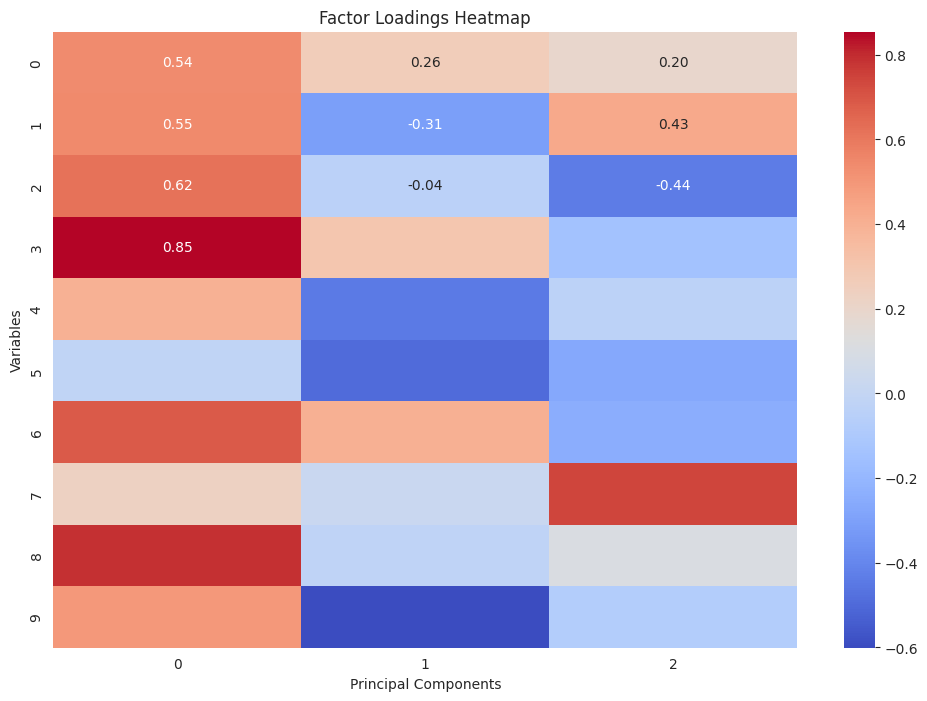

In [27]:
# == Correlation between PCAs ==
plt.figure(figsize=(12, 8))
factor_loadings = pca_.components_.T * np.sqrt(pca_.explained_variance_)
sns.heatmap(factor_loadings, cmap='coolwarm', annot=True, fmt='.2f')
plt.xlabel("Principal Components")
plt.ylabel("Variables")
plt.title("Factor Loadings Heatmap")
plt.show()